<img src="https://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="https://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

<b style="color: red; font-size: 16px;">FXCM has stopped the original API support.<br>Therefore the code in this notebook does unfortunately not work anymore.</b>

# Trading Platform

## Risk Disclaimer

<font size="-1">
Trading forex/CFDs on margin carries a high level of risk and may not be suitable for all investors as you could sustain losses in excess of deposits. Leverage can work against you. Due to the certain restrictions imposed by the local law and regulation, German resident retail client(s) could sustain a total loss of deposited funds but are not subject to subsequent payment obligations beyond the deposited funds. Be aware and fully understand all risks associated with the market and trading. Prior to trading any products, carefully consider your financial situation and experience level. Any opinions, news, research, analyses, prices, or other information is provided as general market commentary, and does not constitute investment advice. FXCM & TPQ will not accept liability for any loss or damage, including without limitation to, any loss of profit, which may arise directly or indirectly from use of or reliance on such information.
</font>

## Author Disclaimer

The author is neither an employee, agent nor representative of FXCM and is therefore acting independently. The opinions given are their own, constitute general market commentary, and do not constitute the opinion or advice of FXCM or any form of personal or investment advice. FXCM assumes no responsibility for any loss or damage, including but not limited to, any loss or gain arising out of the direct or indirect use of this or any other content. Trading forex/CFDs on margin carries a high level of risk and may not be suitable for all investors as you could sustain losses in excess of deposits.

## Retrieving Tick Data

In [1]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format = 'svg'

In [3]:
from fxcmpy import fxcmpy_tick_data_reader as tdr

In [4]:
print(tdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [5]:
start = dt.datetime(2018, 6, 25)  
stop = dt.datetime(2018, 6, 30)  

In [6]:
td = tdr('EURUSD', start, stop)  

In [7]:
td.get_raw_data().info()  

<class 'pandas.core.frame.DataFrame'>
Index: 1963779 entries, 06/24/2018 21:00:12.290 to 06/29/2018 20:59:00.607
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Bid     float64
 1   Ask     float64
dtypes: float64(2)
memory usage: 44.9+ MB


In [8]:
td.get_data().info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1963779 entries, 2018-06-24 21:00:12.290000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Bid     float64
 1   Ask     float64
dtypes: float64(2)
memory usage: 44.9 MB


In [9]:
td.get_data().head()

,Bid,Ask
2018-06-24 21:00:12.290,1.1662,1.16660
2018-06-24 21:00:16.046,1.1662,1.16650
2018-06-24 21:00:22.846,1.1662,1.16658
2018-06-24 21:00:22.907,1.1662,1.16660
2018-06-24 21:00:23.441,1.1662,1.16663


In [10]:
sub = td.get_data(start='2018-06-29 12:00:00',
                  end='2018-06-29 12:15:00')  

In [11]:
sub.head()

,Bid,Ask
2018-06-29 12:00:00.011,1.16497,1.16498
2018-06-29 12:00:00.071,1.16497,1.16497
2018-06-29 12:00:00.079,1.16497,1.16498
2018-06-29 12:00:00.091,1.16495,1.16498
2018-06-29 12:00:00.205,1.16496,1.16498


In [12]:
sub['Mid'] = sub.mean(axis=1)  

In [13]:
sub['SMA'] = sub['Mid'].rolling(1000).mean()  

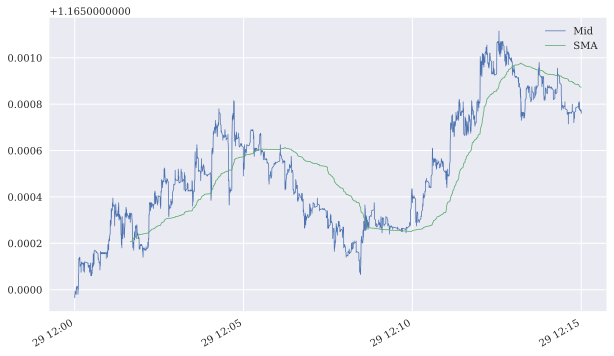

In [14]:
sub[['Mid', 'SMA']].plot(figsize=(10, 6), lw=0.75);
# plt.savefig('../../images/ch14/fxcm_plot_01.png')

## Retrieving Candles Data

In [15]:
from fxcmpy import fxcmpy_candles_data_reader as cdr

In [16]:
print(cdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [17]:
start = dt.datetime(2018, 5, 1)
stop = dt.datetime(2018, 6, 30)

`period` must be one of `m1`, `H1` or `D1`

In [18]:
period = 'H1'  

In [19]:
candles = cdr('EURUSD', start, stop, period)

In [20]:
data = candles.get_data()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1080 entries, 2018-04-29 21:00:00 to 2018-06-29 20:00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BidOpen   1080 non-null   float64
 1   BidHigh   1080 non-null   float64
 2   BidLow    1080 non-null   float64
 3   BidClose  1080 non-null   float64
 4   AskOpen   1080 non-null   float64
 5   AskHigh   1080 non-null   float64
 6   AskLow    1080 non-null   float64
 7   AskClose  1080 non-null   float64
dtypes: float64(8)
memory usage: 75.9 KB


In [22]:
data[data.columns[:4]].tail()  

,BidOpen,BidHigh,BidLow,BidClose
2018-06-29 16:00:00,1.16768,1.16820,1.16731,1.16769
2018-06-29 17:00:00,1.16769,1.16826,1.16709,1.16781
2018-06-29 18:00:00,1.16781,1.16816,1.16668,1.16684
2018-06-29 19:00:00,1.16684,1.16792,1.16638,1.16774
2018-06-29 20:00:00,1.16774,1.16904,1.16758,1.16816


In [23]:
data[data.columns[4:]].tail()  

,AskOpen,AskHigh,AskLow,AskClose
2018-06-29 16:00:00,1.16769,1.16820,1.16732,1.16771
2018-06-29 17:00:00,1.16771,1.16827,1.16711,1.16782
2018-06-29 18:00:00,1.16782,1.16817,1.16669,1.16686
2018-06-29 19:00:00,1.16686,1.16794,1.16640,1.16775
2018-06-29 20:00:00,1.16775,1.16907,1.16760,1.16861


In [24]:
data['MidClose'] = data[['BidClose', 'AskClose']].mean(axis=1)  

In [25]:
data['SMA1'] = data['MidClose'].rolling(30).mean()  
data['SMA2'] = data['MidClose'].rolling(100).mean()  

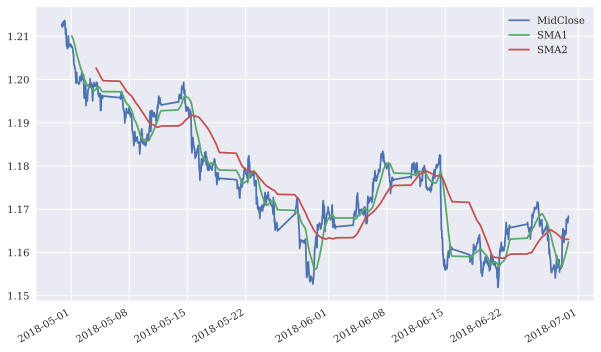

In [26]:
data[['MidClose', 'SMA1', 'SMA2']].plot(figsize=(10, 6));
# plt.savefig('../../images/ch14/fxcm_plot_02.png')

## Connecting to the API

In [27]:
import fxcmpy

In [28]:
fxcmpy.__version__

'1.2.9'

In [30]:
api = fxcmpy.fxcmpy(config_file='../../cfg/fxcm.cfg')  

In [30]:
instruments = api.get_instruments()

In [31]:
print(instruments)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/ILS', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'USDOLLAR', 'US2000', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'USOilSpot', 'UKOilSpot', 'WHEATF', 'CORNF', 'Bund', 'XAU/USD', 'XAG/USD', 'EMBasket', 'JPYBasket', 'BTC/USD', 'BCH/USD', 'ETH/USD', 'LTC/USD', 'XRP/USD', 'CryptoMajor', 'EOS/USD', 'XLM/USD', 'ESPORTS', 'BIOTECH', 'CANNABIS', 'FAANG', 'CHN.TECH', 'CHN.ECOMM', 'USEquities']


## Retrieving Historical Data

In [32]:
candles = api.get_candles('USD/JPY', period='D1', number=10)  

In [33]:
candles[candles.columns[:4]]  

,bidopen,bidclose,bidhigh,bidlow
date,,,,
2020-07-15 21:00:00,107.227,106.925,107.304,106.660
2020-07-16 21:00:00,106.925,107.204,107.396,106.827
2020-07-17 21:00:00,107.204,107.008,107.356,106.933
2020-07-20 21:00:00,107.008,107.241,107.539,107.007
2020-07-21 21:00:00,107.241,106.787,107.362,106.673
2020-07-22 21:00:00,106.787,107.146,107.283,106.705
2020-07-23 21:00:00,107.146,106.853,107.223,106.705
2020-07-24 21:00:00,106.853,106.070,106.899,105.676
2020-07-26 21:00:00,106.078,106.002,106.127,105.905


In [34]:
candles[candles.columns[4:]]  

,askopen,askclose,askhigh,asklow,tickqty
date,,,,,
2020-07-15 21:00:00,107.243,106.945,107.317,106.672,171814
2020-07-16 21:00:00,106.945,107.284,107.407,106.839,173810
2020-07-17 21:00:00,107.284,107.059,107.379,106.945,135795
2020-07-20 21:00:00,107.059,107.276,107.553,107.022,159784
2020-07-21 21:00:00,107.276,106.803,107.373,106.685,176453
2020-07-22 21:00:00,106.803,107.163,107.295,106.718,174734
2020-07-23 21:00:00,107.163,106.871,107.236,106.717,145894
2020-07-24 21:00:00,106.871,106.180,106.923,105.687,240193
2020-07-26 21:00:00,106.185,106.093,106.206,105.996,337


In [35]:
start = dt.datetime(2017, 1, 1)  
end = dt.datetime(2018, 1, 1)  

In [36]:
candles = api.get_candles('EUR/GBP', period='D1',
                          start=start, stop=end)  

In [37]:
candles.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309 entries, 2017-01-03 22:00:00 to 2018-01-01 22:00:00
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bidopen   309 non-null    float64
 1   bidclose  309 non-null    float64
 2   bidhigh   309 non-null    float64
 3   bidlow    309 non-null    float64
 4   askopen   309 non-null    float64
 5   askclose  309 non-null    float64
 6   askhigh   309 non-null    float64
 7   asklow    309 non-null    float64
 8   tickqty   309 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 24.1 KB


The parameter `period` must be one of `m1, m5, m15, m30, H1, H2, H3, H4, H6, H8, D1, W1` or `M1`.

In [38]:
candles = api.get_candles('EUR/USD', period='m1', number=250)  

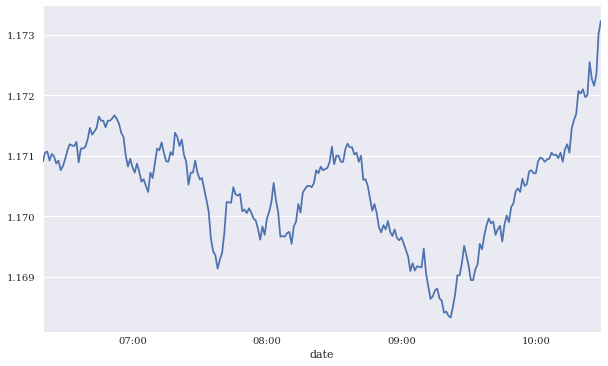

In [39]:
candles['askclose'].plot(figsize=(10, 6))
# plt.savefig('../../images/ch14/fxcm_plot_03.png');

## Streaming Data

In [40]:
def output(data, dataframe):
    print('%3d | %s | %s | %6.5f, %6.5f' 
          % (len(dataframe), data['Symbol'],
             pd.to_datetime(int(data['Updated']), unit='ms'), 
             data['Rates'][0], data['Rates'][1]))  

In [41]:
api.subscribe_market_data('EUR/USD', (output,))  

  2 | EUR/USD | 2020-07-27 10:29:36.921000 | 1.17302, 1.17314
  3 | EUR/USD | 2020-07-27 10:29:37.323000 | 1.17300, 1.17312
  4 | EUR/USD | 2020-07-27 10:29:37.775000 | 1.17299, 1.17311
  5 | EUR/USD | 2020-07-27 10:29:38.799000 | 1.17301, 1.17314
  6 | EUR/USD | 2020-07-27 10:29:39.333000 | 1.17299, 1.17311
  7 | EUR/USD | 2020-07-27 10:29:39.649000 | 1.17300, 1.17313
  8 | EUR/USD | 2020-07-27 10:29:40.158000 | 1.17301, 1.17313


In [42]:
api.get_last_price('EUR/USD')  

  9 | EUR/USD | 2020-07-27 10:29:40.479000 | 1.17300, 1.17313


Bid     1.17300
Ask     1.17313
High    1.17339
Low     1.16409
Name: 2020-07-27 10:29:40.479000, dtype: float64

In [43]:
api.unsubscribe_market_data('EUR/USD')  

## Placing Orders

In [44]:
api.get_open_positions()  

""


In [45]:
order = api.create_market_buy_order('EUR/USD', 100)  

In [46]:
sel = ['tradeId', 'amountK', 'currency',
       'grossPL', 'isBuy']  

In [47]:
api.get_open_positions()[sel]  

,tradeId,amountK,currency,grossPL,isBuy
0,168818203,100,EUR/USD,-11.08222,True


In [48]:
order = api.create_market_buy_order('EUR/GBP', 50)  

In [49]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,168818203,100,EUR/USD,-19.60868,True
1,168818204,50,EUR/GBP,-12.06709,True


In [50]:
order = api.create_market_sell_order('EUR/USD', 25)  

In [51]:
order = api.create_market_buy_order('EUR/GBP', 50)  

In [52]:
api.get_open_positions()[sel]  

,tradeId,amountK,currency,grossPL,isBuy
0,168818203,100,EUR/USD,-11.93480,True
1,168818204,50,EUR/GBP,-17.00531,True
2,168818206,25,EUR/USD,-4.47509,False
3,168818208,50,EUR/GBP,-19.74810,True


In [53]:
api.close_all_for_symbol('EUR/GBP')  

In [54]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,168818203,100,EUR/USD,-14.49263,True
1,168818206,25,EUR/USD,-4.04896,False


In [55]:
api.close_all()  

In [56]:
api.get_open_positions()

""


## Account Information

In [57]:
api.get_default_account()  

1233279

In [58]:
api.get_accounts().T  

,0
t,6
ratePrecision,0
accountId,1233279
balance,49665.4
usdMr,0
mc,N
mcDate,
accountName,01233279
usdMr3,0
hedging,Y


<img src="https://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="https://tpq.io" target="_blank">https://tpq.io</a> | <a href="https://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>